# Clima de Australia
En este proyecto se llevará a cabo un análisis de datos a través de técnicas de minería a través de la metodología de CRISP-DM, en los cuales el objetivo es establecer una relación en el cual exista un patrón proporcional de acuerdo a los datos para poder predecir el clima de Australia, ya que este país particularme tiene una asimetría bastante importante en lo que respecta el clima.
Entonces la idea es obtener un algoritmo de predicción de temperatura y su evolución del día de acuerdo a una zona N

# 1.1 Entendimiento del negocio
La idea de hacer este trabajo va para tener una percepción o buscar patrones dentro del DataSet para predecir las condiciones climáticas de Australia, para esto utilizaremos diversos algoritmos que nos ayudarán a clasificar el dataset.
El objetivo final de llevar a cabo este proyecto será crear una aplicación para predecir la temperatura mínima y máxima en Albury.
Estos datos temperamental a nivel lógico están representados como una variable de tipo cuantitativa continua, por ende lo acotado sería establecer modelos de entrenamiento de regresión.

# 2.1 Análisis exploratorio
En esta etapa de la metodología de CRISP-DM nos enfocaremos principalmente en analizar el dataset, antes que nada subdividiremos la fase de análisis exploratorio en: 
* Visualización 
* Analizar los tipos de datos primitivos que nos provee la data
* Descripción estadística

## 2.1.1 Visualización de la data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
columnas = df.shape[1]
filas = df.shape[0]
totalDatos = columnas * filas
print(f'el total de columnas de la data es de {columnas}, mientras que la cantidad de filas corresponde a {filas}')
print(f'lo que corresponde un total de {totalDatos} datos a analizar')

el total de columnas de la data es de 24, mientras que la cantidad de filas corresponde a 142193
lo que corresponde un total de 3412632 datos a analizar


## 2.1.2 Tipos de datos que encontramos en el DataSet
Acá exploraremos los tipos de datos que podemos encontrar en la data. Esto será muy importante en la etapa de análisis ya que a través de esta observación podemos tener una visión general de lo que se viene en el preprocesamiento de datos, y esto es debido a que los algoritmos en los que se someterán los datos necesitan variables numéricas, que en este caso estarían representados por un Float o un Int. En caso de que existan variables de otra índole como un Objeto habría que ver su comportamiento para establecerlo como una variable cuantitativa nominal u ordinal. 

In [4]:
tipos = df.dtypes
nombreCol = df.columns
for i,j in zip(tipos , nombreCol):
    print(f'El tipo de variable de la columna {j} es {i}')

El tipo de variable de la columna Date es object
El tipo de variable de la columna Location es object
El tipo de variable de la columna MinTemp es float64
El tipo de variable de la columna MaxTemp es float64
El tipo de variable de la columna Rainfall es float64
El tipo de variable de la columna Evaporation es float64
El tipo de variable de la columna Sunshine es float64
El tipo de variable de la columna WindGustDir es object
El tipo de variable de la columna WindGustSpeed es float64
El tipo de variable de la columna WindDir9am es object
El tipo de variable de la columna WindDir3pm es object
El tipo de variable de la columna WindSpeed9am es float64
El tipo de variable de la columna WindSpeed3pm es float64
El tipo de variable de la columna Humidity9am es float64
El tipo de variable de la columna Humidity3pm es float64
El tipo de variable de la columna Pressure9am es float64
El tipo de variable de la columna Pressure3pm es float64
El tipo de variable de la columna Cloud9am es float64
El t

In [5]:
nulos = df.isnull().sum()
totalNulos = df.isnull().sum().sum()
for i,j in zip(nulos, nombreCol):
    print(f'La columna {j} tiene un total de {i} datos nulos')
print(f'En total existen {totalNulos} datos nulos dentro del DataSet')


La columna Date tiene un total de 0 datos nulos
La columna Location tiene un total de 0 datos nulos
La columna MinTemp tiene un total de 637 datos nulos
La columna MaxTemp tiene un total de 322 datos nulos
La columna Rainfall tiene un total de 1406 datos nulos
La columna Evaporation tiene un total de 60843 datos nulos
La columna Sunshine tiene un total de 67816 datos nulos
La columna WindGustDir tiene un total de 9330 datos nulos
La columna WindGustSpeed tiene un total de 9270 datos nulos
La columna WindDir9am tiene un total de 10013 datos nulos
La columna WindDir3pm tiene un total de 3778 datos nulos
La columna WindSpeed9am tiene un total de 1348 datos nulos
La columna WindSpeed3pm tiene un total de 2630 datos nulos
La columna Humidity9am tiene un total de 1774 datos nulos
La columna Humidity3pm tiene un total de 3610 datos nulos
La columna Pressure9am tiene un total de 14014 datos nulos
La columna Pressure3pm tiene un total de 13981 datos nulos
La columna Cloud9am tiene un total de 5

In [6]:
lugares = df['Location'].value_counts()
print(f'En total hay {lugares.count()} localizaciones')

En total hay 49 localizaciones


## 2.1.3 Graficando
En esta etapa utilizaremos diversos gráficos usando la libreria de Matplotlib filtrando la información necesaria que queremos analizar para que sea entendible de esta forma, utilizando información que nos sea útil y determinando el gráfico más apto para llevar a cabo este análisis.
La idea es comparar la evolución de dos ciudades que estan relativamente cerca de Australia, casi en las mismas latitudes pero con una apreciable diferencia de Flora, estas ciudades son Albury y Canberra

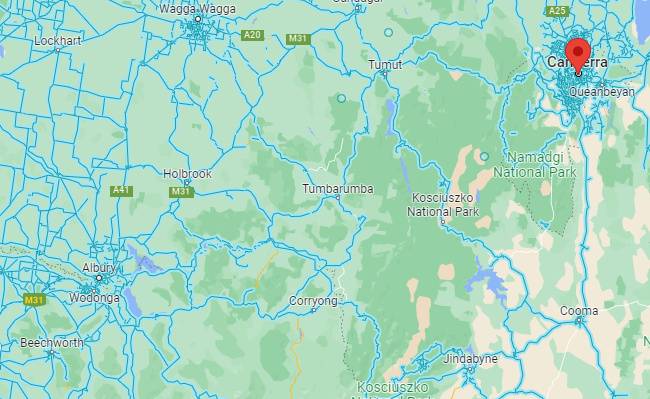

### 2.1.3.1 Comparando la temperatura mínima y máxima de Albury desde el año 2008 hasta el 2017

In [7]:
nombre = ['Albury2008','Albury2009', 'Albury2010', 'Albury2011', 'Albury2012', 'Albury2013', 'Albury2014', 'Albury2015', 'Albury2016', 'Albury2017']
anos = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

Albury = df[
    (df['Location'].str.contains('Albury') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = Albury[
        (Albury['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

Antes que nada tomaremos nuestro dataframe y solo dejaremos la información necesaria para encontrar los registros del año 2017 y dejando la ciudad de Albury, para simplificar todo y acotar algoritmos lo dejaremos declarado como una función parametrizada

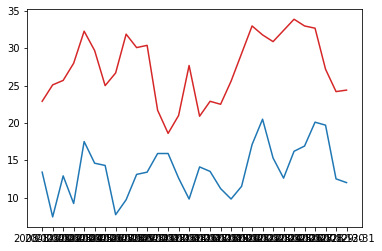

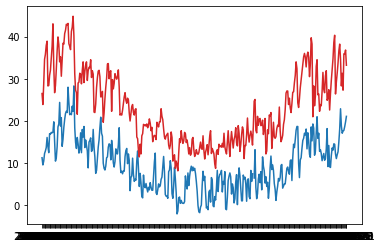

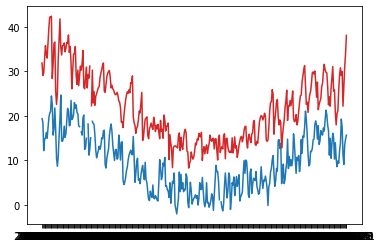

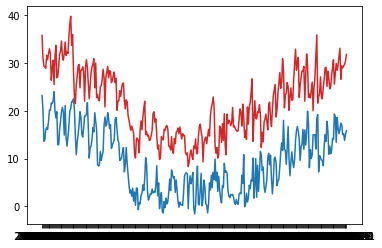

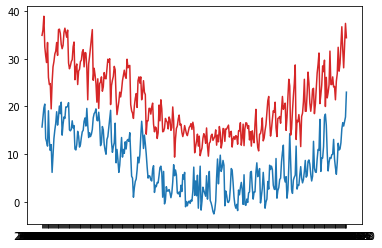

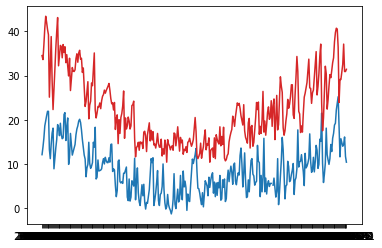

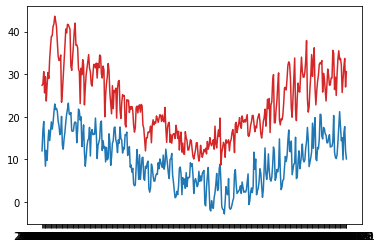

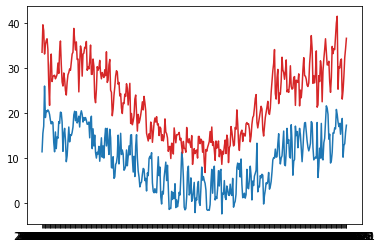

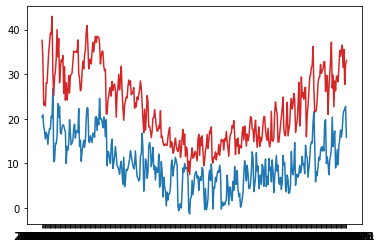

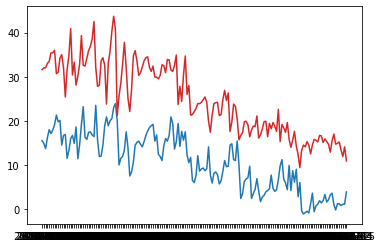

In [8]:
for i in lineas:
    fig, ax = plt.subplots()
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
plt.show()

Acá obtuvimos el registro de las temperaturas máximas y mínimas de Albury desde el año 2008 hasta el 2017, cabe recalcar que justamenete el primer y último año de registro tiene una cantidad menor de datos que las fechas dentro de ese rango

### 2.1.3.2 Comparando la temperatura mínima y máxima de Canberra desde el año 2008 hasta el 2017

In [9]:
nombre = ['Canberra2008','Canberra2009', 'Canberra2010', 'Canberra2011', 'Canberra2012', 'Canberra2013', 'Canberra2014', 'Canberra2015', 'Canberra2016', 'Canberra2017']
anos = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

Canberra = df[
    (df['Location'].str.contains('Canberra') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = Canberra[
        (Canberra['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

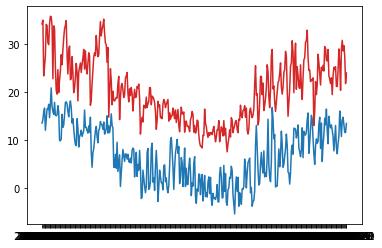

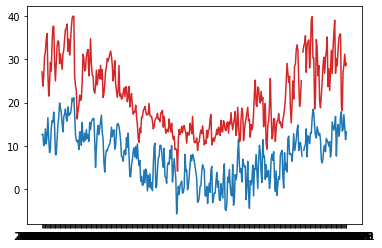

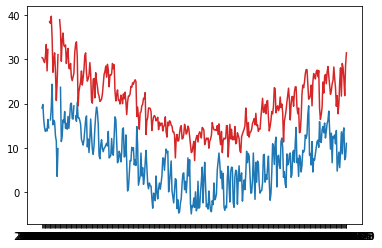

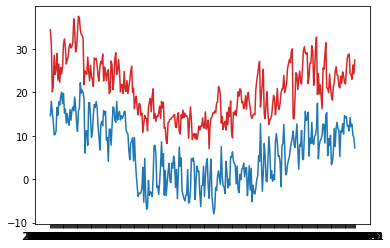

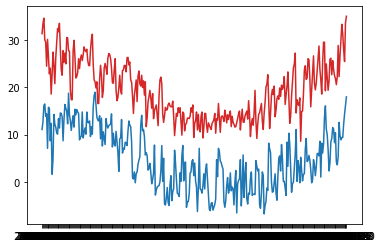

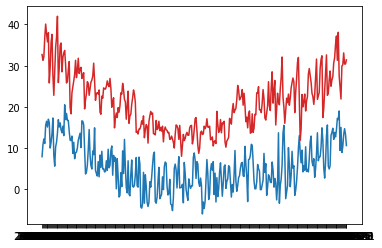

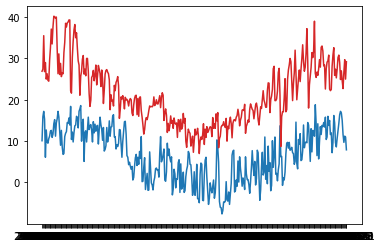

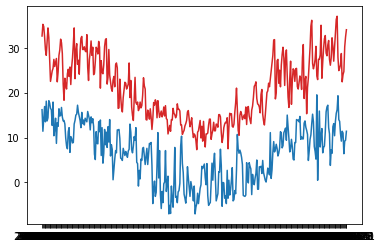

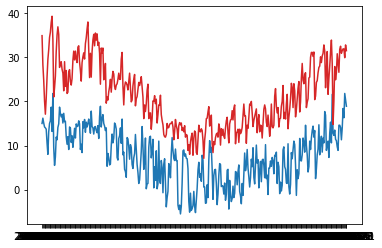

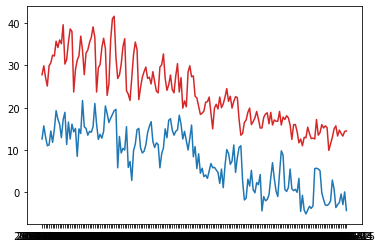

In [10]:
for i in lineas:
    fig, ax = plt.subplots()
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
plt.show()

Podemos observar que el clima en ambas ciudades es muy similar respecto a las fechas, incluyendo ciertas anomalías períodicas como la bajada de temperatura máxima en una determinada fecha. Por ende podemos decir que las condiciones climáticas no son un factor que sea determinante para entender porqué hay una diferencia de flora en ciudades que están relativamente cercas.

In [11]:
Albury.isnull().sum()

Date                0
Location            0
MinTemp             6
MaxTemp             1
Rainfall           20
Evaporation      3011
Sunshine         3011
WindGustDir        10
WindGustSpeed      10
WindDir9am        517
WindDir3pm         42
WindSpeed9am        4
WindSpeed3pm        7
Humidity9am         4
Humidity3pm         4
Pressure9am         0
Pressure3pm         4
Cloud9am         1729
Cloud3pm         1596
Temp9am             4
Temp3pm             4
RainToday          20
RISK_MM             0
RainTomorrow        0
dtype: int64

In [12]:
nulosAlbury = Albury.isnull().sum()
totalNulos = Albury.isnull().sum().sum()
for i,j in zip(nulosAlbury, nombreCol):
    print(f'La columna {j} tiene un total de {i} datos nulos')
print(f'La ciudad de Albury posee un total de {totalNulos} datos nulos dentro del DataSet')

La columna Date tiene un total de 0 datos nulos
La columna Location tiene un total de 0 datos nulos
La columna MinTemp tiene un total de 6 datos nulos
La columna MaxTemp tiene un total de 1 datos nulos
La columna Rainfall tiene un total de 20 datos nulos
La columna Evaporation tiene un total de 3011 datos nulos
La columna Sunshine tiene un total de 3011 datos nulos
La columna WindGustDir tiene un total de 10 datos nulos
La columna WindGustSpeed tiene un total de 10 datos nulos
La columna WindDir9am tiene un total de 517 datos nulos
La columna WindDir3pm tiene un total de 42 datos nulos
La columna WindSpeed9am tiene un total de 4 datos nulos
La columna WindSpeed3pm tiene un total de 7 datos nulos
La columna Humidity9am tiene un total de 4 datos nulos
La columna Humidity3pm tiene un total de 4 datos nulos
La columna Pressure9am tiene un total de 0 datos nulos
La columna Pressure3pm tiene un total de 4 datos nulos
La columna Cloud9am tiene un total de 1729 datos nulos
La columna Cloud3pm 

In [13]:
Albury2016 = Albury[Albury['Date'].str.contains('2016') == True]

<AxesSubplot:xlabel='MaxTemp', ylabel='Humidity3pm'>

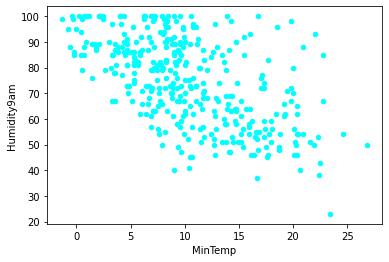

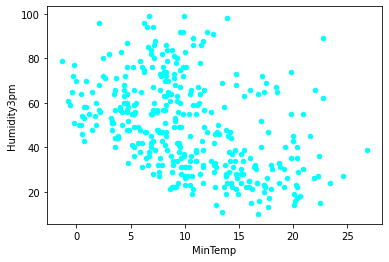

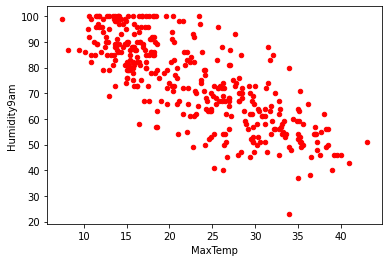

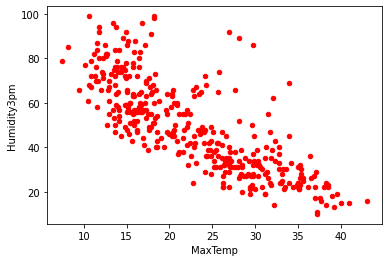

In [14]:
Albury2016.plot(kind = "scatter", x = "MinTemp", y = "Humidity9am", color = "cyan")

Albury2016.plot(kind = "scatter", x = "MinTemp", y = "Humidity3pm", color = "cyan")

Albury2016.plot(kind = "scatter", x = "MaxTemp", y = "Humidity9am", color = "red")

Albury2016.plot(kind = "scatter", x = "MaxTemp", y = "Humidity3pm", color = "red")

Acá podemos apreciar que no existe una relación concreta entre la temperatura mínima con la humedad, pero existe una relación inversamente proporcional entre la humedad y el calor máximo, lo que nos lleva a deducir que existe un clima relativamente seco en Albury

Text(0, 0.5, 'Humedad')

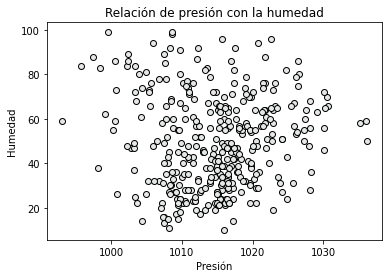

In [25]:
plt.scatter(x = Albury2016['Pressure3pm'], y = Albury2016['Humidity3pm'], edgecolors='black', color='#E5E8E8')
plt.title('Relación de presión con la humedad')
plt.xlabel('Presión')
plt.ylabel('Humedad')

Acá podemos apreciar que no existe un tipo de relación directa entre la presión registrada a las 3 pm con la humedad por ende establecer relaciones entre ambas no nos sirven para poder predecir alguna de las dos variables

Text(0, 0.5, 'Temperatura máxima')

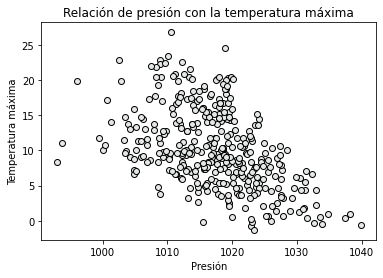

In [27]:
plt.scatter(x = Albury2016['Pressure9am'], y = Albury2016['MinTemp'], edgecolors='black', color='#E5E8E8')
plt.title('Relación de presión de las 9 AM con la temperatura mínima')
plt.xlabel('Presión')
plt.ylabel('Temperatura mínima')

Acá podemos ver que existe una relación proporcionalmente inversa entre la temperatura máxima y la presión, es decir, mientras mayor cantidad de temperatura la presión será menor, por su parte, mientras mayor cantidad de presión exista en el medio ambiente, la temperatura será menor. Por ende es una variable muy decisiva al momento de considerarla para llevar un modelo.

# 3.1 Pre-procesamiento de datos
En esta etapa de la metodología Crisp-DM nos enfocaremos principalmente en dejar los datos que nos sirven para llevar a cabo nuestro modelo de entrenamiento. Esto es debido a que posteriormente, cuando se llegue a una etapa de algoritmos predictivos todo responda de manera eficiente. Hagamonos una pregunta, si nuestro objetivo es predecir el clima de Albury ¿nos sirve tener en nuestro modelo, el clima o los valores de ciudades que sean ajenas de Albury?, la repuesta es no, y esto se explicará a continuación

## Propuestas de limpieza:
    - Dejar solo a albury dentro de la data final
    - Eliminar los registros del año 2008 y 2017
    - Imputar los datos nulos de las columnas que sean decisivas en relación a la temperatura
    - Eliminar columnas que no posean relación con la temperatura
    - Utilizar label encoder o one hot encoder según sea el caso

##3.1.1 Filtro de Albury
Acá lo que haremos será dejar solamente a Albury dentro de nuestro Dataframe, 